| Attribute      | Type                  | Description                       |                                        |
| -------------- | --------------------- | --------------------------------- | -------------------------------------- |
| `mpg`          | Continuous            | Miles per gallon (target)         |                                        |
| `cylinders`    | Integer / Categorical | Number of engine cylinders        |                                        |
| `displacement` | Continuous            | Engine displacement               |                                        |
| `horsepower`   | Continuous            | Engine power (has missing values) |                                        |
| `weight`       | Continuous            | Vehicle weight                    |                                        |
| `acceleration` | Continuous            | Time to accelerate (0–60 mph)     |                                        |
| `model_year`   | Integer               | Model year of the car             |                                        |
| `origin`       | Integer / Categorical | Region of origin                  |                                        |
| `car_name`     | Categorical           | Vehicle name (unique for each)    | ([UCI Machine Learning Repository][1]) |

[1]: https://archive.ics.uci.edu/ml/datasets/auto%2Bmpg?utm_source=chatgpt.com "UCI Machine Learning Repository"


In [1]:
import pandas as pd

# Load dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

columns = ["mpg", "cylinders", "displacement", "horsepower", 
           "weight", "acceleration", "model_year", "origin", "car_name"]

df = pd.read_csv(url, delim_whitespace=True, names=columns)

print(df.head())


C:\Users\nvgra\AppData\Local\Temp\ipykernel_24220\681175158.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns)


    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


#### horsepower has missing values marked as ?

In [2]:
import numpy as np

df["horsepower"] = df["horsepower"].replace("?", np.nan)
df["horsepower"] = df["horsepower"].astype(float)

# Drop missing values
df = df.dropna()


### We predict mpg

In [3]:
X = df.drop(["mpg", "car_name"], axis=1)
y = df["mpg"]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
y_pred = model.predict(X_test)


In [7]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)


MSE: 10.710864418838366
R² Score: 0.7901500386760352


### See Feature Impact (Coefficients)

In [8]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print(coefficients)


        Feature  Coefficient
0     cylinders    -0.345789
1  displacement     0.015109
2    horsepower    -0.021302
3        weight    -0.006142
4  acceleration     0.037950
5    model_year     0.767743
6        origin     1.613457


### Visualization (Predicted vs Actual)

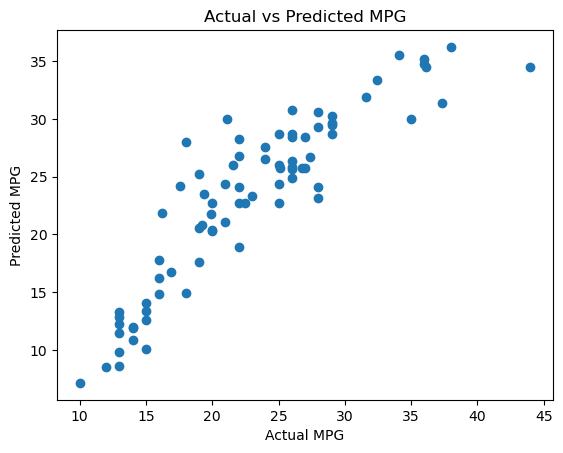

In [9]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.show()


#### How much MPG changes when that feature increases by 1 unit, while all other features stay constant.

From typical results:

🚗 Heavier cars = lower MPG

🔥 More horsepower = lower MPG

🕰️ Newer cars = higher MPG

🌍 Origin matters (European/Japanese cars often more efficient)

In [10]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)


        Feature  Coefficient
6        origin     1.613457
5    model_year     0.767743
4  acceleration     0.037950
1  displacement     0.015109
3        weight    -0.006142
2    horsepower    -0.021302
0     cylinders    -0.345789
